This notebook contains the code to reproduce the results presented in Section 5 of the final report, LRT, for either Test 1a or Test 3c.

Search for "TODO" and replace the second argument in the LRT tests to change the test that you wish to run. Replace variable with `data_good` for dataset I (or `data_good_6p` for dataset II) to run Test 3c, whereas `representative_heatmap` for dataset I (or `representative_heatmap_6p` for dataset II) is used to run Test 1a.

# 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score
warnings.filterwarnings('ignore')

In [2]:
# Importing all datasets available (excluding time series data)
data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')

data_metrics = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_3p.csv')
data_metrics_6p = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_6p.csv')

data_heatmap_new1 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_h2m.csv')
data_heatmap_new2 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_t2m.csv')

data_heatmap_6p = pd.concat([data_heatmap_new1,data_heatmap_new2],axis=0).drop(columns=['click_x_rel','click_y_rel'])

In [3]:
# Importing grid ID of broken banners per grid
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986']

cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353']

cb_333346_6p = ['ID_106', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_136', 
             'ID_1542', 'ID_1589', 'ID_1602', 'ID_185', 'ID_1908', 'ID_1915', 
             'ID_1916', 'ID_1971',  'ID_2015', 'ID_2063', 'ID_2133', 'ID_2143', 
             'ID_2336', 'ID_2337', 'ID_2368', 'ID_243', 'ID_245', 'ID_2553', 
             'ID_2564', 'ID_2635', 'ID_2636', 'ID_267', 'ID_2693', 'ID_27', 
             'ID_2737', 'ID_2750', 'ID_2762', 'ID_2867', 'ID_2924', 'ID_2933', 
             'ID_2977', 'ID_3172', 'ID_3219', 'ID_324', 'ID_3268', 'ID_333', 
             'ID_3334', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567', 'ID_3605', 
             'ID_362', 'ID_3633', 'ID_3640', 'ID_365', 'ID_367', 'ID_3672', 
             'ID_3699', 'ID_3730', 'ID_3809', 'ID_3837', 'ID_3848', 'ID_3920', 
             'ID_3939', 'ID_3982', 'ID_401', 'ID_4042', 'ID_4058', 'ID_4072', 
             'ID_4076', 'ID_4199', 'ID_4206', 'ID_4224', 'ID_4378', 'ID_4507', 
             'ID_466', 'ID_494', 'ID_539', 'ID_62', 'ID_727', 'ID_737', 
             'ID_861', 'ID_876', 'ID_889', 'ID_90', 'ID_922', 'ID_949', 
             'ID_981', 'ID_993']

cb_333519_6p = ['ID_1081', 'ID_1150', 'ID_1464', 'ID_1518', 'ID_1622', 'ID_1623', 
                'ID_1624', 'ID_1631', 'ID_1678', 'ID_1623', 'ID_1731', 'ID_1752', 
                'ID_1764', 'ID_1795', 'ID_1915', 'ID_1916', 'ID_1971', 'ID_198', 
                'ID_2018', 'ID_204', 'ID_2044', 'ID_2104', 'ID_2108', 'ID_2109', 
                'ID_2146', 'ID_2251', 'ID_2330', 'ID_2336', 'ID_2381', 'ID_2383', 
                'ID_2400', 'ID_2616', 'ID_2636', 'ID_2749', 'ID_2766', 'ID_2779', 
                'ID_2809', 'ID_284', 'ID_2875', 'ID_2881', 'ID_30', 'ID_3021', 
                'ID_3049', 'ID_3098', 'ID_3178', 'ID_3183', 'ID_3219', 'ID_3232', 
                'ID_3561', 'ID_3644', 'ID_365', 'ID_3850', 'ID_389', 'ID_4025', 
                'ID_4036', 'ID_4050', 'ID_4058', 'ID_4075', 'ID_4113', 'ID_4122', 
                'ID_4255', 'ID_4257', 'ID_4275', 'ID_4347', 'ID_44', 'ID_4506', 
                'ID_4567', 'ID_618', 'ID_727', 'ID_737', 'ID_922', 'ID_950', 
                'ID_960', 'ID_969']

cb_333346_6p = ['ID_106', 'ID_1003', 'ID_1081', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_1303', 'ID_1347', 
                'ID_136', 'ID_1464', 'ID_1542', 'ID_1579', 'ID_1589', 'ID_1602', 'ID_1624','ID_1640', 'ID_1731',
                'ID_185', 'ID_1902', 'ID_1908', 'ID_1915', 'ID_1916', 'ID_1917','ID_1971', 'ID_1974', 'ID_2015', 
                'ID_2063', 'ID_2077', 'ID_2099', 'ID_2104', 'ID_2108', 'ID_2133', 'ID_2143', 'ID_2214', 'ID_2242',
                'ID_2279', 'ID_2336', 'ID_2337', 'ID_2368', 'ID_2400', 'ID_2404', 'ID_243', 'ID_2435', 'ID_245', 
                'ID_2553', 'ID_2564', 'ID_2598', 'ID_2626', 'ID_2627', 'ID_2635', 'ID_2636', 'ID_2648', 'ID_267', 
                'ID_2693', 'ID_27', 'ID_2737', 'ID_2750', 'ID_2760', 'ID_2762', 'ID_2766', 'ID_2779', 'ID_2809', 
                'ID_2867', 'ID_2881', 'ID_2924', 'ID_2933', 'ID_2977', 'ID_3019', 'ID_3098', 'ID_313', 'ID_3157', 
                'ID_3172', 'ID_3178', 'ID_3219', 'ID_3231', 'ID_324', 'ID_3268', 'ID_3308', 'ID_333', 'ID_3334', 
                'ID_3375', 'ID_3389', 'ID_3405', 'ID_3418', 'ID_3472', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567',
                'ID_3605', 'ID_3614', 'ID_362', 'ID_3633', 'ID_3640', 'ID_3644', 'ID_365', 'ID_367', 'ID_3672', 
                'ID_3699', 'ID_3726', 'ID_3730', 'ID_3781', 'ID_3799', 'ID_3800', 'ID_3809', 'ID_3837', 'ID_3848', 
                'ID_3850', 'ID_389', 'ID_3917', 'ID_3920', 'ID_3939', 'ID_3982', 'ID_401', 'ID_4016', 'ID_4040',
                'ID_4042', 'ID_4058', 'ID_4072', 'ID_4076', 'ID_4199', 'ID_4204', 'ID_4206', 'ID_4224', 'ID_4275',
                'ID_429', 'ID_4347', 'ID_4378', 'ID_4507', 'ID_4567','ID_466', 'ID_494', 'ID_514', 'ID_539', 
                'ID_582', 'ID_62', 'ID_71', 'ID_727', 'ID_731', 'ID_737', 'ID_825', 'ID_861', 'ID_869', 'ID_876', 
                'ID_889', 'ID_90', 'ID_922', 'ID_949', 'ID_969', 'ID_979', 'ID_981', 'ID_993']

cb_333346_new = ['ID_1071', 'ID_1149', 'ID_1246', 'ID_1300', 'ID_1358', 'ID_1614', 'ID_1894', 'ID_1999', 
                 'ID_2142', 'ID_2198', 'ID_2274', 'ID_2331', 'ID_2400', 'ID_2438', 'ID_2495', 'ID_2710', 
                 'ID_2808', 'ID_3197', 'ID_3335', 'ID_418', 'ID_657', 'ID_773', 'ID_906', 'ID_962']

cb_333519_new = ['ID_10', 'ID_1077', 'ID_1178', 'ID_1203', 'ID_1246', 'ID_1262', 'ID_1671', 'ID_1691', 
                 'ID_1999', 'ID_2198', 'ID_2495', 'ID_2569', 'ID_2619', 'ID_3180', 'ID_3308', 'ID_394', 
                 'ID_678', 'ID_793']


In [4]:
# Dictionary cb = "clearly broken" (resp cb_6p) is a dictionary of the grid IDs of the broken banners in dataset I (resp II)
cb = {333519: cb_333519+cb_333519_new, 333346: cb_333346+cb_333346_new}
cb_6p = {333519: cb_333519_6p, 333346: cb_333346_6p}

# 2. Data wrangling

In [5]:
# Create aggregated_clicks_by_grid for the subsequent tests

data_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)

max_width = data_expanded['display_width'].max()
max_height = data_expanded['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded['click_x_bin'] = pd.cut(data_expanded['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded['click_y_bin'] = pd.cut(data_expanded['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks = data_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')

aggregated_clicks_by_grid = aggregated_clicks.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

In [6]:
# Create aggregated_clicks_by_grid_6p for the subsequent tests

data_expanded_6p = data_heatmap_6p.loc[data_heatmap_6p.index.repeat(data_heatmap_6p['clicks'])].reset_index(drop=True)

max_width = data_expanded_6p['display_width'].max()
max_height = data_expanded_6p['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded_6p['click_x_bin'] = pd.cut(data_expanded_6p['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded_6p['click_y_bin'] = pd.cut(data_expanded_6p['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks_6p = data_expanded_6p.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


aggregated_clicks_by_grid_6p = aggregated_clicks_6p.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

# 3. Data enhancement and calculating average banner

In [7]:
from itertools import product

# Upsampling
def enhance_data(data, prob, size, sdev):
    indices = np.random.choice(data.index, 
                                   size, 
                                   replace=True, 
                                   p = data[prob])
    
    pert_x = np.random.normal(0, sdev, size).round().astype(int)
    pert_y = np.random.normal(0, sdev, size).round().astype(int)

    x = data.loc[indices][['click_x_bin', 'click_y_bin']] + np.array((pert_x, pert_y)).reshape(-1,2)
    x_bin_max = data['click_x_bin'].max()
    y_bin_max = data['click_y_bin'].max()
    
    x[x['click_x_bin'] < 0]['click_x_bin'] = 0
    x[x['click_y_bin'] < 0]['click_y_bin'] = 0
    x[x['click_x_bin'] > x_bin_max]['click_x_bin'] = x_bin_max
    x[x['click_y_bin'] > y_bin_max]['click_y_bin'] = y_bin_max
    
    x = x.groupby(['click_x_bin','click_y_bin']).size().reset_index(name = 'clicks_sum')

    tt = pd.DataFrame(list(product(range(0,x_bin_max+1), range(0,y_bin_max+1))), 
                      columns=['click_x_bin', 'click_y_bin'])

    data_obs_merged = tt.merge(x, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
    return data_obs_merged

# 4. LRT on dataset I 

## 4a. Calculate the empirical distribution for the working banners (i.e. representative working banner)

Calculate the empirical distribution for the working banners (i.e. $H_0$). To do this, we pick a representative banner from the same dataset. This is hence a one shot learning algorithm

In [8]:
# Create the list of domains for each grid id, for dataset I (domains_by_grid_id) and dataset II (domains_by_grid_id_6p)
domains_by_grid_id = pd.DataFrame(aggregated_clicks.groupby('grid_id')['domain'].unique()).reset_index()
domains_by_grid_id_6p = pd.DataFrame(aggregated_clicks_6p.groupby('grid_id')['domain'].unique()).reset_index()

Total clicks for (grid_id, domain): (333519, ID_1501): 196561


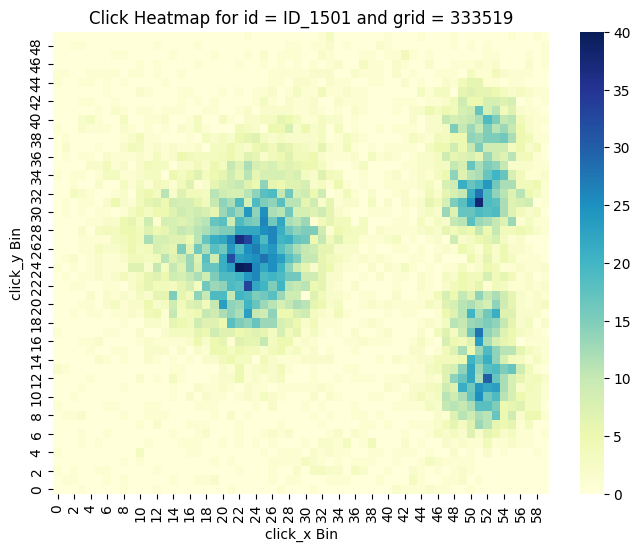

Total clicks for (grid_id, domain): (333519, ID_1501): 86364


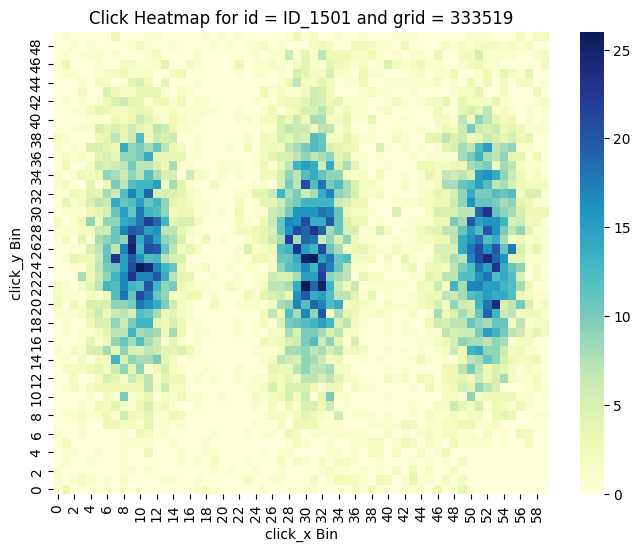

In [9]:
# Selection of empirical distribution: pick most clicks and highest landing rate:

representative_heatmap = {}

for g_id in [333519, 333346]:
    filtered_data = data_metrics[data_metrics.grid_id == g_id]

    result = filtered_data[(filtered_data.landed_clicks / filtered_data.clicks) > 0.8]
    dom = result.sort_values(by='clicks', ascending=False).iloc[0].domain
    representative_heatmap[g_id] = dom
    
    data_obs = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                 (aggregated_clicks.domain == dom)]
    print(f'Total clicks for (grid_id, domain): (333519, {dom}): {data_obs.clicks_sum.sum()}')
    data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
    data_obs_enh = enhance_data(data_obs, 'proba', 10000, 1.5)
    click_matrix = data_obs_enh.pivot("click_y_bin",
                                      "click_x_bin",
                                      "clicks_sum").fillna(0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")
    plt.title(f'Click Heatmap for id = {dom} and grid = {333519}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.show()

## 4b. Calculate the empirical distribution for the broken banners (i.e. representative bad banner)

Calculate the empirical distribution for the broken banners (i.e. $H_1$). To do this, we use the broken banners from dataset II and sum all the distributions.

In [10]:
data_broken = {}
data_broken_proba = {}

In [11]:
# Data wrangling to aggregate on bad banners
for g_id in [333519, 333346]:
    agg_broken = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) & 
                      (aggregated_clicks_6p.domain.isin(cb_6p[g_id]))]
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
    agg_broken['proba'] = agg_broken['clicks_sum'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x_bin','click_y_bin'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()


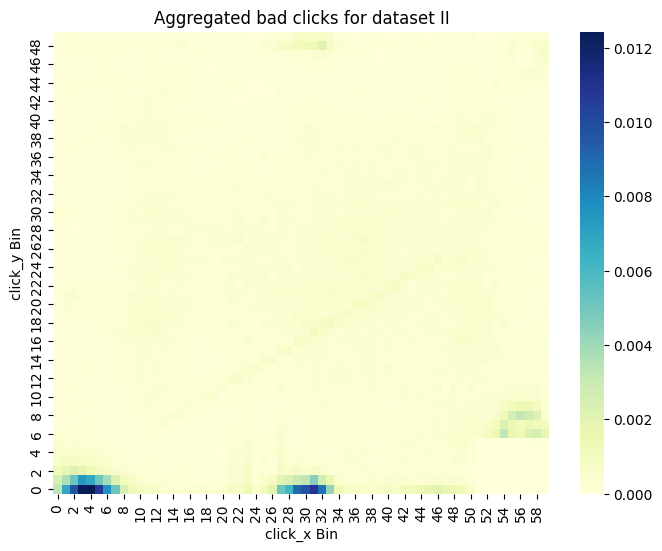

In [12]:
# Data wrangling to aggregate on bad banners
combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333519].drop(columns = ['grid_id']), on = ['click_x_bin','click_y_bin'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y_bin",
                                  "click_x_bin",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for dataset II')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

In [13]:
# Representative good distribution (test 3c)
BOXES_FROM_BDRY = 5
data_good_6p = pd.DataFrame(list(product(range(0,60),range(0,50))), 
                    columns=['click_x_bin', 'click_y_bin'])
data_good_6p['clicks'] = 1
data_good_6p.loc[data_good_6p.click_x_bin < BOXES_FROM_BDRY, 'clicks'] = 0
data_good_6p.loc[data_good_6p.click_y_bin < BOXES_FROM_BDRY, 'clicks'] = 0
data_good_6p.loc[data_good_6p.click_x_bin > data_good_6p.click_x_bin.max() - BOXES_FROM_BDRY, 'clicks'] = 0
data_good_6p.loc[data_good_6p.click_y_bin > data_good_6p.click_y_bin.max() - BOXES_FROM_BDRY, 'clicks'] = 0
data_good_6p['proba'] = data_good_6p['clicks']/data_good_6p.clicks.sum()

data_good = data_good_6p.copy()

# Representative bad distribution (both tests 1a and 3c)
data_bad_6p = combined_agg_broken[['click_x_bin','click_y_bin','proba_comb']].copy()
data_bad_6p = data_bad_6p.rename(columns = {'proba_comb':'proba'})

## 4c. Run LRT on dataset I:

### Defining functions

In [14]:
# The below function runs the LRT test using the representative good banner (representative_heatmap, H_0)
# and representative bad banner (data_bad_6p, H_1)
def LRT(aggregated_clicks, representative_heatmap, domains_by_grid_id, cb, data_bad_6p):
    start_time = time.time()
    # avoid dividing by 0:
    eps = 1e-20

    outputs = {333519: [], 333346: []}
    labels = {333519: [], 333346: []}
    domains = {333519: [], 333346: []}

    for g_id in [333519, 333346]: 
        try:
            data = pd.DataFrame(list(product(range(0,60),range(0,50))), 
                                        columns=['click_x_bin', 'click_y_bin'])

            # representative probabilities:
            data_obs_rep = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                                (aggregated_clicks.domain == representative_heatmap[g_id])]

            # merge enhanced observed heatmap with empirical distribution
            # in order to get empircal probabilities for bins:
            data_obs_rep = data_obs_rep.merge(data, 
                                            on=['click_x_bin','click_y_bin'], 
                                            how='right').fillna(0)

            data_obs_rep['proba'] = data_obs_rep.clicks_sum/data_obs_rep.clicks_sum.sum()

        except:
            data_obs_rep = representative_heatmap

        data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                            on = ['click_x_bin','click_y_bin'], 
                            how='left' )

        data = data.fillna(0)

        # run over domains, dom for given grid_id = g_id:
        for dom in domains_by_grid_id[domains_by_grid_id.grid_id == g_id]['domain'].iloc[0]:

            # data_obs = "observed" heatmap for current domain_id = dom
            data_obs_1 = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                            (aggregated_clicks.domain == dom)]
            
            data_obs_1['clicks_sum'] = 1000*data_obs_1['clicks_sum']/data_obs_1['clicks_sum'].sum()
            data_obs = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data, 
                                            on=['click_x_bin','click_y_bin'], 
                                            how='right').fillna(0)
            
            from_obs = (np.log(data_obs['proba']+eps)*data_obs['clicks_sum']).sum()
            
            ####################
            # "lrt" method starts here

            data_obs_bad = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data_bad_6p, 
                                            on=['click_x_bin','click_y_bin'], 
                                            how='right').fillna(0)

            from_obs_bad = (np.log(data_obs_bad['proba']+eps)*data_obs_bad['clicks_sum']).sum()

            loglrt = from_obs - from_obs_bad

            
            outputs[g_id].append(loglrt)
            domains[g_id].append(dom)
            if dom in cb[g_id]: # broken
                labels[g_id].append(1)
            else: # working
                labels[g_id].append(0)

    end_time = time.time()
    nb_banners = len(domains_by_grid_id.iloc[0]['domain']) + len(domains_by_grid_id.iloc[1]['domain'])

    return (end_time - start_time) / nb_banners, outputs, labels, domains

In [15]:
# Generate predictions in [0, 1] based on the LRT ratio
# def generate_preds(outputs, min, max):
#     preds = {}
#     for g_id in [333346, 333519]:
#         neg_outputs = np.negative(outputs[g_id])
#         preds_g_id = (neg_outputs - min)/(max - min)
#         preds_g_id = [1 if preds_g_id[i] > 1 else preds_g_id[i] for i in range(len(preds_g_id))]
#         preds_g_id = [0 if preds_g_id[i] < 0 else preds_g_id[i] for i in range(len(preds_g_id))]
#         preds[g_id] = preds_g_id
#     return preds

def generate_preds(outputs, min, max):
    # print(min)
    # print(max)
    preds = {}
    for g_id in [333346, 333519]:
        preds_g_id = np.negative(np.array(outputs[g_id]))
        preds_g_id = (np.array(outputs[g_id]) - max)/(min - max)
        preds_g_id = [1 if preds_g_id[i] > 1 else preds_g_id[i] for i in range(len(preds_g_id))]
        preds_g_id = [0 if preds_g_id[i] < 0 else preds_g_id[i] for i in range(len(preds_g_id))]
        preds[g_id] = preds_g_id
    return preds

In [16]:
# Converts a dictionary with each grid_id the key to a list of outputs into a list of outputs by concactination
def combine_all_outputs(output_list):
    return np.array(output_list[333346] + output_list[333519])

In [17]:
# Given a list of domain IDs and a g_id, plot all heatmaps
def plot_heatmaps(heatmap_list, g_id):
    for dom in heatmap_list:
        data_obs = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                    (aggregated_clicks.domain == dom)]
        print(f'Total clicks for (grid_id, domain): ({g_id}, {dom}): {data_obs.clicks_sum.sum()}')
        # data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
        # data_obs_enh = enhance_data(data_obs, 'proba', 10000, 1.5)
        click_matrix = data_obs.pivot("click_y_bin",
                                        "click_x_bin",
                                        "clicks_sum").fillna(0)
        plt.figure(figsize=(8, 6))
        sns.heatmap(click_matrix, 
                    cmap = "YlGnBu", 
                    annot = False, 
                    cbar = True, 
                    fmt = "g")
        plt.title(f'Click Heatmap for id = {dom} and grid = {333519}')
        plt.xlabel('click_x Bin')
        plt.ylabel('click_y Bin')
        plt.gca().invert_yaxis() 
        plt.show()

In [18]:
# Plots ROC curve based on a list of labels (0 or 1) and a list of preds (float between 0 and 1)
def plot_roc_curve(all_labels, all_preds):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_preds)

    # Calculate AUC score
    auc = roc_auc_score(all_labels, all_preds)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return auc

In [19]:
# plot_roc_curve based on a list of labels (0 or 1) and a list of preds (float between 0 and 1)
def calculate_all_f1(all_labels, all_preds):
    threshs = np.linspace(1,0.01,100)
    best_f1 = 0
    best_thresh = 0
    all_f1 = []
    for thresh in threshs:
        all_preds_cut_off = [1 if all_preds[i] > thresh else 0 for i in range(len(all_preds))]
        f1 = f1_score(all_labels, all_preds_cut_off, average='macro')
        
        if best_f1 < f1:
            best_f1 = f1
            best_thresh = thresh
        all_f1.append(f1)
        # print(f1)
    return all_f1, best_f1, best_thresh

In [20]:
# Generate fn, fp which are dictionaries of lists of domain IDs which are false negatives (fn) and false positives (fp)
# key of dictionary is the g_id
# fn = broken banners not detected, fp = working banners misclassified as broken
def identify_misclassified_banners(domains, preds, labels, thresh):
    fn = {}
    fp = {}
    for g_id in [333346, 333519]:
        fn_g_id = []
        fp_g_id = []
        domains_g_id = domains[g_id]
        for ind in range(len(domains[g_id])):
            preds_rounded = [0 if preds[g_id][i] < thresh else 1 for i in range(len(preds[g_id]))] 
            if preds_rounded[ind] == 0 and labels[g_id][ind] == 1: # False negative
                fn_g_id.append(domains_g_id[ind])
            elif preds_rounded[ind] == 1 and labels[g_id][ind] == 0: # False positive
                fp_g_id.append(domains_g_id[ind])
        fn[g_id] = fn_g_id
        fp[g_id] = fp_g_id
    return fn, fp

### Code execution: the following lines of code use the functions defined above and are self-explanatory 

In [21]:
# TODO: for the second argument in the LRT function, use `representative_heatmap` 
# if running Test 1a, otherwise use `data_good` for Test 3c
time_per_banner_old, outputs_old, labels_old, domains_old = LRT(aggregated_clicks, data_good, domains_by_grid_id, cb, data_bad_6p)

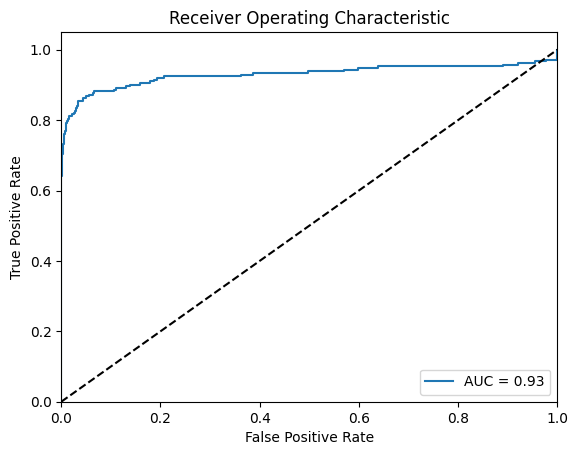

Time per banner:  0.03377494671684569
Best f1 is 0.91 at threshold 0.23
Confusion matrix at best threshold: 
[[1504   17]
 [  44  168]]
AUC:  0.9293197127014253


In [22]:
preds_old = generate_preds(outputs_old, min(outputs_old[333346] + outputs_old[333519]), max(outputs_old[333346] + outputs_old[333519]))
all_labels_old = combine_all_outputs(labels_old)
all_preds_old = combine_all_outputs(preds_old)
all_outputs_old = combine_all_outputs(outputs_old)
all_f1_old, best_f1_old, best_thresh_old = calculate_all_f1(all_labels_old, all_preds_old)
all_preds_rounded_old = [1 if all_preds_old[i] > best_thresh_old else 0 for i in range(len(all_preds_old))]
fn_old, fp_old = identify_misclassified_banners(domains_old, preds_old, labels_old, best_thresh_old)
auc_old = plot_roc_curve(all_labels_old, all_preds_old)

print("Time per banner: ", time_per_banner_old) # time per domain
print(f"Best f1 is {round(best_f1_old, 2)} at threshold {round(best_thresh_old, 2)}")
print("Confusion matrix at best threshold: ")
print(confusion_matrix(all_labels_old, all_preds_rounded_old))
print("AUC: ", auc_old)

In [23]:
old = {"preds": preds_old, "outputs": outputs_old, "labels": labels_old, "domains": domains_old, "time_per_banner": time_per_banner_old}

In [24]:
# Visualize distribution for the predictions
# plt.hist(all_preds_old, bins = 20)

In [25]:
# Visualize distributions of outputs
# plt.hist(all_outputs_old, bins = 20)

In [26]:
# Plot false positive heatmaps
# plot_heatmaps(fp_old[333346], 333346)

# 5. LRT - dataset II:
same pre-processing and execution as section 4, refer to section 4 for commented code

## 5a. Representative working

Total clicks for (grid_id, domain): (333519, ID_3516): 482667


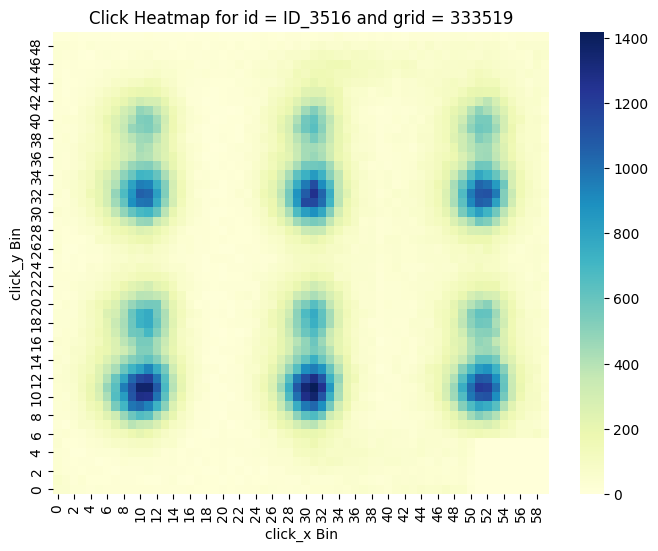

Total clicks for (grid_id, domain): (333346, ID_3709): 29316


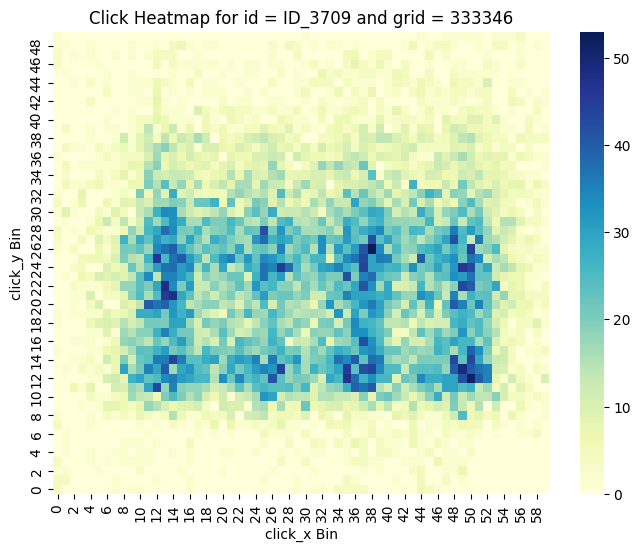

In [27]:
representative_heatmap_6p = {}

for g_id in [333519, 333346]:
    filtered_data = data_metrics_6p[data_metrics_6p.grid_id == g_id]

    result = filtered_data[(filtered_data.landed_clicks / filtered_data.clicks) > 0.8]
    uniq_doms = result.domain.unique()
    f1 = data_heatmap_6p[(data_heatmap_6p.grid_id==g_id)]
    dom_sorted = f1[f1.domain.isin(uniq_doms)].groupby(['domain']).sum('clicks').sort_values(by='clicks', 
                                                                                             ascending=False)
    dom = dom_sorted.reset_index().iloc[0].domain
    representative_heatmap_6p[g_id] = dom
    
    data_obs = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                                 (aggregated_clicks_6p.domain == dom)]
    print(f'Total clicks for (grid_id, domain): ({g_id}, {dom}): {data_obs.clicks_sum.sum()}')
    data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
    #data_obs_enh = enhance_data(data_obs, 'proba', 10000, 1.5)
    click_matrix = data_obs.pivot("click_y_bin",
                                      "click_x_bin",
                                      "clicks_sum").fillna(0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")
    plt.title(f'Click Heatmap for id = {dom} and grid = {g_id}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.show()

In [28]:
data_heatmap_6p[(data_heatmap_6p.grid_id==333346)].groupby(['domain']).sum('clicks').sort_values(by='clicks', 
                                                                                             ascending=False).head(5)

,Unnamed: 0,grid_id,click_x,click_y,display_height,display_width,clicks
domain,,,,,,,
ID_3516,176085547398,16285952176,7648508,6109790,12214000,14656800,208944
ID_1220,169149476860,13909861888,6364339,5397037,10432000,12518400,109542
ID_762,115841530327,11152090430,5175136,4181641,8363750,10036500,66326
ID_2883,83035543672,7281943370,3416916,3093539,5461250,6553500,35724
ID_2387,82165179182,6804258552,3194504,2803468,5103000,6123600,31977


Total clicks for (grid_id, domain): (333519, ID_3516): 262245


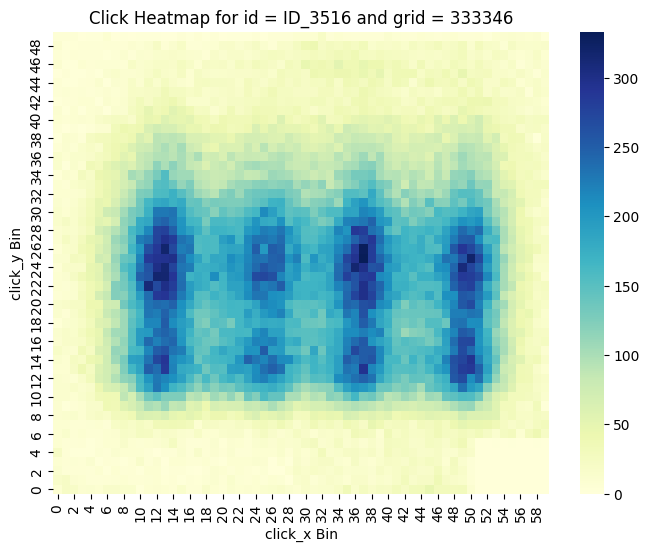

In [29]:
dom = 'ID_3516'
representative_heatmap_6p[333346] = dom
    
data_obs = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                             (aggregated_clicks_6p.domain == dom)]
print(f'Total clicks for (grid_id, domain): (333519, {dom}): {data_obs.clicks_sum.sum()}')
data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
# data_obs_enh = enhance_data(data_obs, 'proba', 200000, 0)
click_matrix = data_obs.pivot("click_y_bin",
                                  "click_x_bin",
                                  "clicks_sum").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Click Heatmap for id = {dom} and grid = {333346}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

## 5b. Representative broken (using bad data from dataset I)
same preprocessing steps as used in 5a

In [30]:
for g_id in [333519, 333346]:
    agg_broken = aggregated_clicks[(aggregated_clicks.grid_id == g_id) & 
                      (aggregated_clicks.domain.isin(cb[g_id]))]
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
    agg_broken['proba'] = agg_broken['clicks_sum'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x_bin','click_y_bin'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()

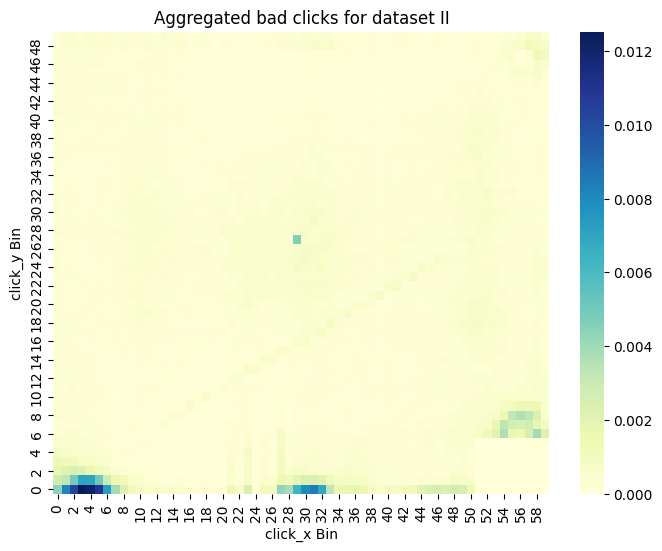

In [31]:
combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333519].drop(columns = ['grid_id']), on = ['click_x_bin','click_y_bin'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y_bin",
                                  "click_x_bin",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for dataset II')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

In [32]:
data_bad = combined_agg_broken[['click_x_bin','click_y_bin','proba_comb']].copy()
data_bad = data_bad.rename(columns = {'proba_comb':'proba'})

In [33]:
data_bad

,click_x_bin,click_y_bin,proba
0,0,0,0.004380
1,0,1,0.002814
2,0,2,0.001768
3,0,3,0.001394
4,0,4,0.000809
...,...,...,...
2959,59,49,0.000240
2960,51,2,0.000004
2961,52,1,0.000004
2962,54,5,0.000004


## 5c. Run LRT on dataset II:

In [34]:
domains_by_grid_id_6p

,grid_id,domain
0,333346,"[ID_1003, ID_1007, ID_1013, ID_1022, ID_1030, ..."
1,333519,"[ID_10, ID_1000, ID_1001, ID_1007, ID_1008, ID..."


In [35]:
# TODO: for the second argument in the LRT function, use `representative_heatmap_6p` 
# if running Test 1a, otherwise use `data_good_6p` for Test 3c
time_per_banner_new, outputs_new, labels_new, domains_new = LRT(aggregated_clicks_6p, data_good_6p, domains_by_grid_id_6p, cb_6p, data_bad)

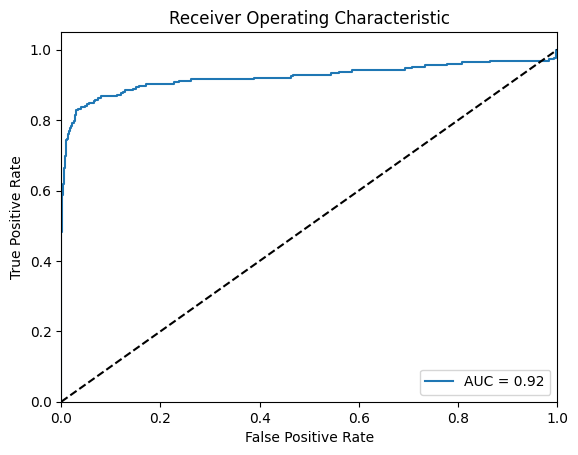

Time per banner:  0.057241352635248266
Best f1 is 0.89 at threshold 0.25
Confusion matrix at best threshold: 
[[2774   30]
 [  58  168]]
AUC:  0.9220282655624708


In [36]:
preds_new = generate_preds(outputs_new, min(outputs_new[333346] + outputs_new[333519]), max(outputs_new[333346] + outputs_new[333519]))
all_labels_new = combine_all_outputs(labels_new)
all_preds_new = combine_all_outputs(preds_new)
all_outputs_new = combine_all_outputs(outputs_new)
all_f1_new, best_f1_new, best_thresh_new = calculate_all_f1(all_labels_new, all_preds_new)
all_preds_rounded_new = [1 if all_preds_new[i] > best_thresh_new else 0 for i in range(len(all_preds_new))]
fn_new, fp_new = identify_misclassified_banners(domains_new, preds_new, labels_new, best_thresh_new)
auc_new = plot_roc_curve(all_labels_new, all_preds_new)

print("Time per banner: ", time_per_banner_new) # time per domain
print(f"Best f1 is {round(best_f1_new, 2)} at threshold {round(best_thresh_new, 2)}")
print("Confusion matrix at best threshold: ")
print(confusion_matrix(all_labels_new, all_preds_rounded_new))
print("AUC: ", auc_new)

In [37]:
new = {"preds": preds_new, "outputs": outputs_new, "labels": labels_new, "domains": domains_new, "time_per_banner": time_per_banner_new}

In [38]:
# plt.hist(all_preds_new, bins = 20)

In [39]:
# plt.hist(all_outputs_new, bins = 20)

# 6. Save and load outputs

In [40]:
## Code to save outputs

# import pickle 
# results = {"new": new, "old": old}
# with open('Stat_approach_output/test_1.pkl', 'wb') as f:
#     pickle.dump(results, f)

In [41]:
## Code to load outputs

# with open('Stat_approach_output/test_1.pkl', 'rb') as f:
#     check_results = pickle.load(f)